In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

params = {'figure.constrained_layout.use': False,
          'axes.facecolor': 'gainsboro',
          'axes.grid': True,
          'grid.linestyle': '--',
          'axes.labelsize': 16,
          'axes.titlesize': 18,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
def fillna_win(row):
    if row.win<=0:
        if row.bet == 0:
            row.win = 0
        else:
            row.win = -row.bet
    return row.win

In [3]:
log = pd.read_csv('log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log["user_id"] != '#error']
log['user_id'] = log['user_id'].str.split(' - ').apply(lambda x: x[1])
log['time'] = log['time'].str.replace('[','')
log['time'] = pd.to_datetime(log['time'])
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['win'] = log.apply(lambda row: fillna_win(row), axis=1) 
log['net'] = log[['bet', 'win']].apply(lambda x: x[1] if x[1] < 0 else x[1] - x[0], axis=1)
users = pd.read_csv('users.csv', encoding='KOI8-R', sep='\t')
users.columns = ['user_id', 'email', 'geo']
users['user_id'] = users['user_id'].apply(lambda x: x.lower())

<ipython-input-3-0f8e36832967>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  log['time'] = log['time'].str.replace('[','')


In [201]:
log.bet.mean()

6785.738144329897

<AxesSubplot:>

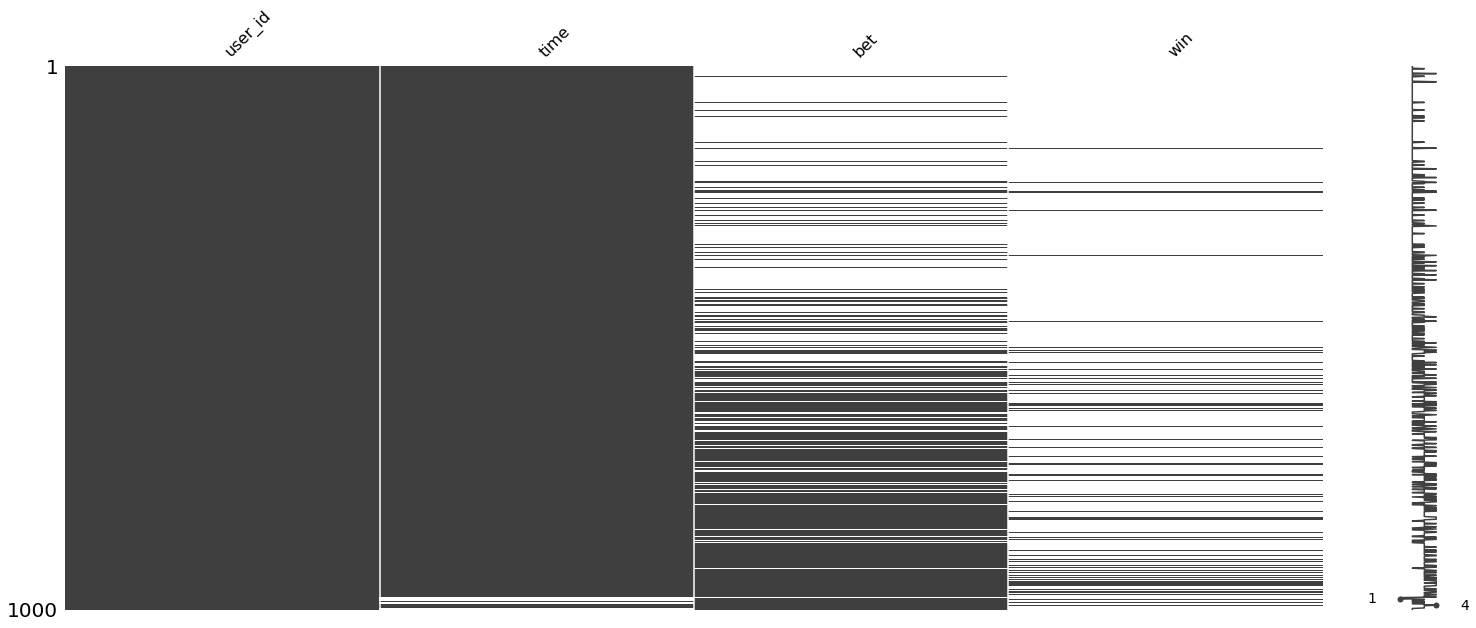

In [89]:
msno.matrix(log)

In [6]:
users.columns = ['user_id', 'email', 'geo']

In [26]:
log[log['time'].isna()].shape[0]

15

In [48]:
log.drop('time', axis=1, inplace=True)

<AxesSubplot:>

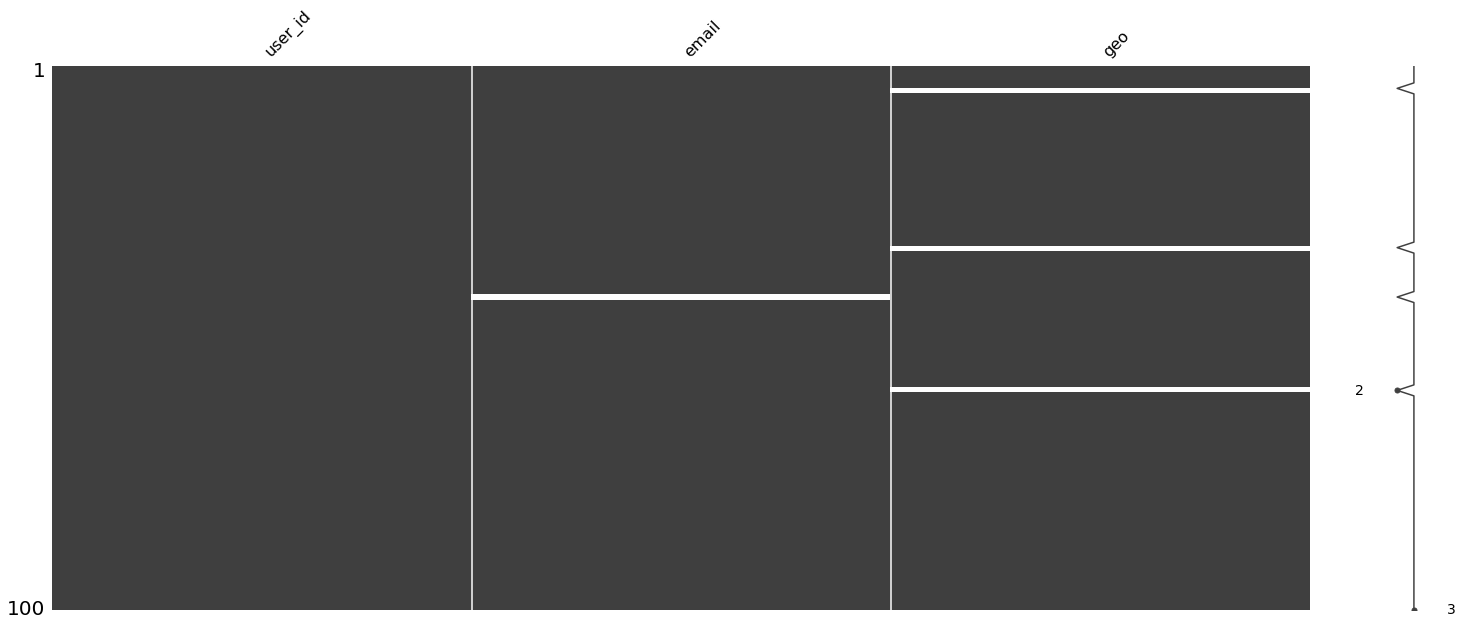

In [46]:
msno.matrix(users)

In [49]:
log

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN
...,...,...,...
995,Запись пользователя № - user_984,9754.0,NaN
996,#error,10054.0,29265.0
997,#error,10454.0,NaN
998,#error,1000.0,NaN


In [53]:
log.drop_duplicates(subset=['user_id','time'], inplace=True)

In [54]:
log.shape[0]

986

In [68]:
log['time'] = pd.to_datetime(log['time'])

In [70]:
log['time'].max().strftime('%Y-%m-%d')

'2019-04-20'

In [71]:
log = pd.read_csv("log.csv")  
log = log.dropna()  
log.columns = ['user_id', 'time', 'bet', 'win']  
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])
log['time'].head()

13    2019-01-02 08:57:36
28    2019-01-04 13:59:42
150   2019-01-16 21:54:22
188   2019-01-21 18:34:44
204   2019-01-22 05:26:59
Name: time, dtype: datetime64[ns]

In [77]:
log['time'].dt.minute.value_counts().idxmax()

36.0

In [78]:
log['time'].dt.month.value_counts().idxmin()

4.0

In [88]:
log['time'].dt.dayofweek.value_counts()[6] + log['time'].dt.dayofweek.value_counts()[5]

283

In [105]:
log = log[~pd.isna(log.time)]

In [107]:
def day_parts(x):
    if 0 <= x.hour <= 5:
        return 'night'
    if 6 <= x.hour <= 11:
        return 'morning'
    if 12 <= x.hour <= 17:
        return 'afternoon'
    if 18 <= x.hour <= 23:
        return 'evening'

In [109]:
log['day_parts'] = log['time'].apply(day_parts)

In [110]:
log['day_parts'].value_counts().idxmin()

'evening'

In [160]:
log['bet'].value_counts()[0]

515

In [168]:
(log['win']<0).sum()

347

In [170]:
(log['net']>0).sum()

138

In [172]:
round(log['net'][log['win'] > 0].mean())

80253

In [173]:
round(log['net'][log['win'] > 0].median())

5347

In [218]:
(log['bet']>0).sum()/log.shape[0]*100

48.5

In [219]:
log['bet'][log['bet']>0].mean()

6785.738144329897

In [220]:
log['net'][log['bet']>0].mean()

20421.892783505155

In [222]:
(log['net']<0).sum()/log[log['bet'] > 0].shape[0]*100

71.54639175257732

In [223]:
(log['net']>0).sum()/log[log['bet'] > 0].shape[0]*100

28.45360824742268

In [4]:
log = pd.read_csv('log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log["user_id"] != '#error']
log['user_id'] = log['user_id'].str.split(' - ').apply(lambda x: x[1])
users = pd.read_csv('users.csv', encoding='KOI8-R', sep='\t')
users.columns = ['user_id', 'email', 'geo']
users['user_id'] = users['user_id'].apply(lambda x: x.lower())

In [5]:
df = pd.merge(log, users, on='user_id') 

In [6]:
df['time'] = df['time'].str.replace('[','')
df['time'] = pd.to_datetime(df['time'])
df['bet'] = df['bet'].fillna(0)
df['win'] = df['win'].fillna(0)
df['win'] = df.apply(lambda row: fillna_win(row), axis=1) 
df['net'] = df[['bet', 'win']].apply(lambda x: x[1] if x[1] < 0 else x[1] - x[0], axis=1)

<ipython-input-6-bec9a9af18e5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['time'] = df['time'].str.replace('[','')


In [258]:
df.groupby('user_id').net.sum().median()

1986.0

In [7]:
no_bet = df[df['bet'] == 0].groupby('user_id').bet.count()

In [9]:
group_ids = no_bet.index

In [11]:
with_bet = df[(df['user_id'].isin(group_ids)) & (df['bet'] > 0)].user_id.nunique()

In [14]:
no_bet.sum()/with_bet

5.05

In [15]:
time_min = df[df.bet==0].groupby('user_id').time.min()

In [20]:
time_min_not_null = df[df.bet>0].groupby('user_id').time.min()

In [21]:
time_df = pd.merge(time_min, time_min_not_null, on='user_id')

In [23]:
time_df['delta'] = time_df['time_y'] - time_df['time_x']

In [26]:
(time_df['delta'].sum().days)/time_df.delta.count()

46.28

In [34]:
df.groupby('geo').win.sum().sort_values(ascending=False).index[1]

'Воронеж'

In [40]:
mean_bet = df[df['bet'] > 0].groupby('geo').bet.mean()

In [41]:
mean_bet.max()/mean_bet.min()

127.81602335164835

In [44]:
df.groupby('geo').user_id.count()

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: user_id, dtype: int64